# Netflix Exploratory Data Analysis
---

## 1. Introduction

This project was developed as a **personal learning exercise** to strengthen my skills in **data analysis**, with a particular focus on **Exploratory Data Analysis (EDA)**. The goal is twofold:  
1. To practice the process of **cleaning, exploring, and visualizing real-world data**.  
2. To extract **meaningful insights** about the structure and trends of Netflix content.  

The dataset used in this analysis comes from [Kaggle’s *Netflix Movies and TV Shows* dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows), which contains information such as titles, release years, countries, genres, ratings, and durations. This rich dataset provides an excellent opportunity to explore patterns in Netflix’s catalog and to demonstrate the application of various Python tools for data analysis.


### 1.1. Before starting

Before diving into the dataset, it is essential to import the core Python libraries that will support the analysis. These libraries provide the necessary tools for data manipulation, numerical computations, and visualization, forming the foundation of most modern data analysis workflows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

After setting up the environment, the next step is to **load the dataset** into a Pandas DataFrame. This will allow us to efficiently manipulate, clean, and explore the data throughout the analysis.

The dataset is stored in the local `./dataset` folder as a CSV file. We begin by reading it into a DataFrame and inspecting its basic structure to better understand its contents.

In [2]:
df = pd.read_csv('./dataset/netflix_titles.csv')
print(df.shape)

(8807, 12)


We can confirm that the data is correctly imported. Now it is time to start doing the data Analysis

---
##

## 2. Data Analysis

### 2.1. Data Overview

Before performing any cleaning or detailed exploration, it is important to gain a **general understanding** of the dataset. In this step, we will:  

- Inspect the first few rows of the data.  
- Check the dataset’s dimensions (number of rows and columns).  
- Review each feature, including its data type and meaning.  
- Identify missing values and duplicates.

This initial inspection helps to **frame the scope of the analysis** and informs the decisions we will make in the data cleaning phase.

In [3]:
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print(f"Shape: {df.shape}")

Shape: (8807, 12)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


| Feature | Description | Category |
|-----|-----|-----|
| show_id | Unique identifier for each show of the dataset. | Identifier |
| type | Type of content - either *Movie* or *TV show*. | Categorical |
| title | Title of the movie or TV show. | Text |
| director | Director of the content. | Categorical |
| cast | Main actors/actresses featured in the content. | Text/Categorical |
| country | Country (or countries) where the content was produced. | Categorical |
| date_added | Date when the content was added to Netflix. | Datetime |
| release_year | Year the content was originally released. | Numerical (Integer) |
| rating | Netflix maturity rating. | Categorical |
| duration | Duration of the content - in minutes for Movies or in number of seasons for TV Shows. | Mixed (Numeric/String) |
| listed_in | Genres/Categories of the content (comma-separated list). | Categorical (Multi-label) |
| description | Short summary of the content. | Text |

I will separate the missing values and duplicate values identification in two ways: Quantitative identification and percentage

In [6]:
missing_count = df.isna().sum()
missing_count = missing_count[missing_count!=0]
print("Missing Values:")
display(missing_count)

Missing Values:


director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

In [7]:
missing_percent=round((df.isna().sum()/len(df))*100, 2)
missing_percent = missing_percent[missing_percent!=0]
print("Missing Values Percentage")
display(missing_percent)

Missing Values Percentage


director      29.91
cast           9.37
country        9.44
date_added     0.11
rating         0.05
duration       0.03
dtype: float64

The table above shows the **percentage of missing values** for each feature in the dataset (features not in this table have no missing values)

As we can see, the `director` feature has a high percentage of missing values (~30%). Handling these missing entries by filling or imputing could significantly distort the dataset, introducing bias and making it no longer reflect reality. Therefore, for the purposes of this analysis, we will **leave the missing values in `director` as they are**. Same for `cast`

The other columns have a relatively low percentage of missing data, and we will handle them as needed during the data cleaning phase.

In [8]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


As there are no duplicate rows, **no further action is required** for duplicates.

######

### 2.2. Data Cleaning & Preprocessing

#### 2.2.1. Handle Missing Values & Convert Types

We start by handling missing values. Features such as `director`, `cast`, and `country` have missing entries. Imputing them with guesses could introduce bias, so we fill them with `Unknown`. Retaining `Unknown` also preserves the fact that data was missing, which can be insightful later.

In [9]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

display(df.isna().sum()[df.isna().sum()!=0])

date_added    10
rating         4
duration       3
dtype: int64

Next, we handle `date_added`, `rating`, and `duration`. Converting these features to the correct types ensures easier analysis and reliable handling of values.

In [10]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = df['release_year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


##### Splitting Dataset by Type 
Some features behave differently for TV Shows and Movies, so we **split the dataset** into two separate DataFrames. This allows us to handle missing values, data quality, and feature-specific transformations more effectively.

In [11]:
tv_series_df = df[df['type']=="TV Show"].copy()
movies_df = df[df['type']=="Movie"].copy()

print("TV Series Dataframe:")
display(tv_series_df.head())

print("\n\n\n\nMovies Dataframe:")
display(movies_df.head())

print("TV series missing values:")
print(tv_series_df.isna().sum()[tv_series_df.isna().sum()!=0])

print("\nMovies missing values:")
print(movies_df.isna().sum()[movies_df.isna().sum()!=0])

TV Series Dataframe:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...






Movies Dataframe:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


TV series missing values:
date_added    10
rating         2
dtype: int64

Movies missing values:
rating      2
duration    3
dtype: int64


##### Handling TV Series Dataframe Missing Values

We'll start by handling missing data for TV Series.

For the date_added column, some values are missing or inconsistent.

- First, we sort by release_year to maintain chronological order.
- Then, we interpolate missing dates linearly.
- This may create some “impossible” dates (where date_added < release_year), which we handle in the next step.

In [12]:
tv_series_df=tv_series_df.sort_values(by='release_year')

tv_series_df['date_added_temp']=tv_series_df['date_added'].map(lambda x: x.timestamp() if pd.notna(x) else np.nan)
tv_series_df['date_added_temp']=tv_series_df['date_added_temp'].interpolate(method='linear')

tv_series_df['date_added'] = pd.to_datetime(tv_series_df['date_added_temp'], unit='s')
tv_series_df['date_added'] = tv_series_df['date_added'].dt.strftime('%Y-%m-%d')
tv_series_df = tv_series_df.drop(columns='date_added_temp')

After ensuring that `date_added` is properly handled, we address missing values in the `rating` column.

Approach chosen:
- Fill missing values with a random valid rating from the dataset.
- This preserves the overall distribution of ratings without biasing toward a single value.
- A random seed is set to ensure reproducibility.
- Since only a small fraction of rows have missing ratings, this approach is appropriate and avoids overcomplicating the pipeline.

In [13]:
choices = tv_series_df['rating'].dropna().unique().tolist()
np.random.seed(42)
tv_series_df['rating'] = tv_series_df['rating'].apply(
    lambda x: np.random.choice(choices) if pd.isna(x) else x
)
print(tv_series_df.isna().sum()[tv_series_df.isna().sum()!=0])

Series([], dtype: int64)


We have successfully handled all missing values and prepared the TV Series dataset for further analysis. Next, we apply similar preprocessing steps to the Movies dataset.

##### Handling Movies Dataframe Missing Values

We now handle missing values in the **Movies dataset**, starting with the `rating` column.
- Missing ratings are filled with a **random selection from existing ratings**, consistent with how we handled TV Shows.
- This preserves the original distribution and avoids biasing toward a single rating.
- A random seed is set to ensure reproducibility.

In [14]:
choices = movies_df['rating'].dropna().unique().tolist()
np.random.seed(42)
movies_df['rating'] = movies_df['rating'].apply(
    lambda x: np.random.choice(choices) if pd.isna(x) else x
)
print(movies_df.isna().sum()[movies_df.isna().sum()!=0])

duration    3
dtype: int64


Next, we handle missing values in the `duration` column.

- The `duration` column currently contains strings like "90 min".
- We remove the *" min"* suffix, convert to numeric, and fill missing values with the **median**.
- Median is preferred over mean because it is robust to outliers in movie lengths.

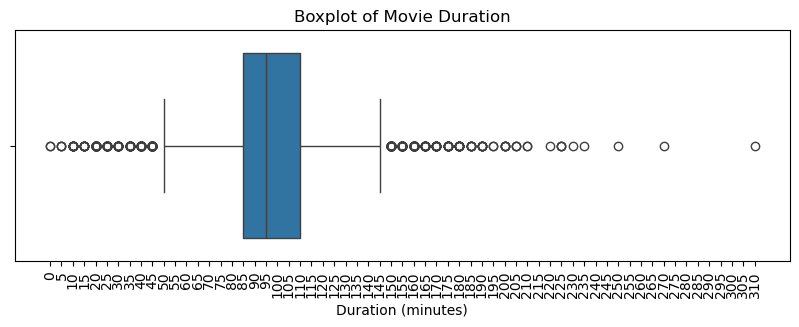

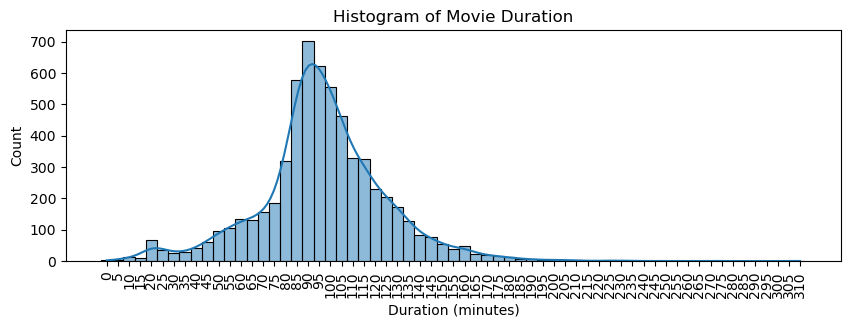

In [15]:
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')

bins = range(0, int(movies_df['duration'].max()) + 5, 5)
labels = [f"{b}" for b in bins[:-1]]

movies_df['duration_bin'] = pd.cut(movies_df['duration'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 3))
sns.boxplot(x=movies_df['duration_bin'])
plt.title("Boxplot of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.xticks(rotation=90, ha='center')

plt.show()

plt.figure(figsize=(10, 3))
sns.histplot(movies_df['duration_bin'], bins=30, kde=True)
plt.title("Histogram of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='center')
plt.show()

movies_df = movies_df.drop(columns='duration_bin')

In [22]:
display(movies_df[['title', 'duration']].head())

,title,duration
0,Dick Johnson Is Dead,90.0
6,My Little Pony: A New Generation,91.0
7,Sankofa,125.0
9,The Starling,104.0
12,Je Suis Karl,127.0


In [23]:
median_duration = movies_df['duration'].median()
movies_df['duration']=movies_df['duration'].fillna(median_duration)

print(movies_df.isna().sum()[movies_df.isna().sum()!=0])

Series([], dtype: int64)


#### 2.2.2. Ensure Data Quality

Having the null values handled we shall now guarantee that there are no "impossible" rows in the dataframe.

In [18]:
tv_series_df['date_added'] = pd.to_datetime(tv_series_df['date_added'], errors='coerce')
print(f"Number of rows with date_added before release_year {len(tv_series_df[tv_series_df['date_added'].dt.year<tv_series_df['release_year']])}")

def adjust_date(row):
    if pd.notna(row['date_added']) and row['date_added'].year < row['release_year']:
        try:
            return row['date_added'].replace(year=row['release_year'])
        except ValueError:
            return datetime(row['release_year'], row['date_added'].month, min(row['date_added'].day, 28))
    return row['date_added']

#temp['date_added'] = pd.to_datetime(temp['date_added'], errors='coerce')
tv_series_df['date_added'] = tv_series_df.apply(adjust_date, axis=1)

Number of rows with date_added before release_year 12


As we see we have 12 rows with impossible data. Let's fix it. For that I will keep the date as it is and only change the year. 

For example, a date_added 2012-03-01 with release_date 2015 will be changed to 2015-03-01.

In [19]:
def adjust_date(row):
    if pd.notna(row['date_added']) and row['date_added'].year < row['release_year']:
        try:
            return row['date_added'].replace(year=row['release_year'])
        except ValueError:
            return datetime(row['release_year'], row['date_added'].month, min(row['date_added'].day, 28))
    return row['date_added']

tv_series_df['date_added'] = tv_series_df.apply(adjust_date, axis=1)

In [20]:
print(f"Number of rows with date_added before release_year: {len(tv_series_df[tv_series_df['date_added'].dt.year<tv_series_df['release_year']])}")

Number of rows with date_added before release_year: 0


As we can see, we don't have any more rows with impossible data. After this we will try to check values where the date_added is before the Netflix foundation. Netflix's streaming service was only created on 2007 but Netflix already existed before, operating as a mail-order DVD rental service since August 29, 1997. So no movie nor tv shows should be added before.

In [21]:
print(tv_series_df.sort_values(by="date_added")['date_added'])

6611   2008-02-04
5940   2013-08-02
5939   2013-09-01
6885   2013-10-08
7908   2013-10-14
          ...    
3      2021-09-24
4      2021-09-24
1      2021-09-24
1696   2021-11-15
1551   2021-12-14
Name: date_added, Length: 2676, dtype: datetime64[ns]


As we can see the first TV show was added in 2008 which means that all the data is correct. This means that the date_added column is already handled.

#### 2.2.3. Standardize Categories

#### 2.2.4. General Cleanup

#### 2.2.5. Feature Engineering